**Bharat Intern Task - 2**

**Name : Varsha Chigurupati**

**Course : machine Learning**

**Title : Movie Recommendation**

Movie Recommendation System

*Description:*

The goal of this project is to construct a recommendation system to suggest movies to users. This model aims to forecast user preferences for movies by leveraging a dataset containing pertinent features such as user ratings, genres, and movie metadata. By employing techniques in machine learning and data processing, this project offers practical exposure to the process of creating, assessing, and interpreting recommendation models.

In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162736 sha256=e778c0351b273fef786c938de4946988a37c686032611402d1b69135dc089031
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
from spacy import displacy
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/archive (2)/ratings.csv')
movie_title = pd.read_csv('/content/drive/MyDrive/archive (2)/movies.csv')

In [ ]:
print('dataset :')
print(dataset.head(2))
print('titles :')
print(movie_title.head(2))

dataset :
   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
titles :
   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy


In [ ]:
print(dataset.columns)
print(movie_title.columns)


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['movieId', 'title', 'genres'], dtype='object')


In [ ]:
data = pd.merge(dataset,movie_title , on = 'movieId')


In [ ]:
data.head()


,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [ ]:
data.shape


(25000095, 6)

In [ ]:
data["userId"].value_counts().count()

162541

In [ ]:
len(data['title'].unique())


58958

In [ ]:
max = data['rating'].max()
min = data['rating'].min()
print(f'high rating = {max} , low rating = {min}')

high rating = 5.0 , low rating = 0.5


In [ ]:
data_rating = dict(data['rating'].value_counts())
data_rating

{4.0: 6639798,
 3.0: 4896928,
 5.0: 3612474,
 3.5: 3177318,
 4.5: 2200539,
 2.0: 1640868,
 2.5: 1262797,
 1.0: 776815,
 1.5: 399490,
 0.5: 393068}

<Axes: title={'center': 'Rating Count'}>

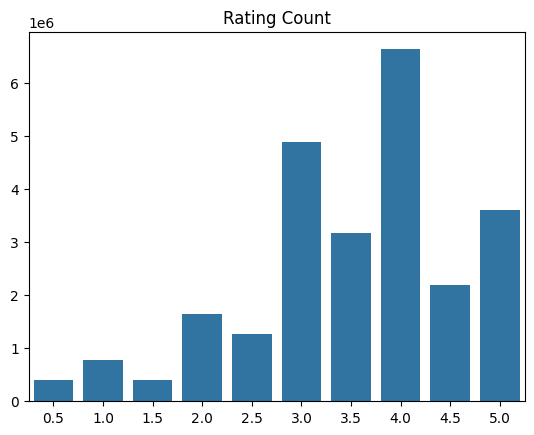

In [ ]:
plt.title('Rating Count')
sns.barplot(x = list(data_rating.keys()), y = list(data_rating.values()))

In [ ]:
# Calculate average rating and count of ratings for each movie
movie_stats = data.groupby('title')['rating'].agg(['mean', 'count']).reset_index()
movie_stats.rename(columns={'mean': 'average_rating', 'count': 'count_rating'}, inplace=True)

# Merge movie statistics with the main data
data = pd.merge(data, movie_stats, on='title', how='left')

data.head(2)


,userId,movieId,rating,timestamp,title,genres,average_rating,count_rating
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,79672
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,79672


In [ ]:
C = data['average_rating'].mean()
M = data['count_rating'].quantile(0.90)

In [ ]:
Q_movies = data.copy().loc[data['count_rating'] >=M]
Q_movies.shape

(2507110, 8)

In [ ]:
# Function to generate pivot table
movie_rate = pd.pivot_table(Q_movies, index='userId', columns='title', values='rating', fill_value=0)

movie_rate.head()

title,Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),Fight Club (1999),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,4.0,0.0,0.0,3.5,1.0,0.0,0.0
3,0.0,5.0,0.0,3.5,0.0,0.0,0.0,5.0,0.0,5.0,...,4.0,4.0,4.0,4.0,4.0,0.0,4.0,0.0,4.5,5.0
4,0.0,0.0,0.0,2.5,0.0,0.0,0.0,4.5,0.0,0.0,...,3.5,4.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0
5,4.0,0.0,5.0,3.0,3.0,0.0,3.0,0.0,3.0,0.0,...,5.0,5.0,5.0,0.0,0.0,0.0,4.0,0.0,5.0,5.0


In [ ]:
def weighted_rating(x, M=M, C=C):
    v = x['count_rating']
    R = x['average_rating']
    # Calculation based on the IMDB formula
    return (v/(v+M) * R) + (M/(M+v) * C)

In [ ]:
Q_movies['score'] = Q_movies.apply(weighted_rating , axis = 1)
Q_movies = Q_movies.sort_values('score' , ascending = False)

In [ ]:
Q_movies['title'].unique()[:15]

array(['Shawshank Redemption, The (1994)', 'Godfather, The (1972)',
       'Usual Suspects, The (1995)', 'Pulp Fiction (1994)',
       "Schindler's List (1993)", 'Fight Club (1999)',
       'Silence of the Lambs, The (1991)', 'Matrix, The (1999)',
       'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Forrest Gump (1994)',
       'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
       'American Beauty (1999)',
       'Lord of the Rings: The Fellowship of the Ring, The (2001)',
       'Dark Knight, The (2008)'], dtype=object)

In [ ]:
len(Q_movies['title'].unique())


49

<Axes: title={'center': 'Top 15 Movies'}, ylabel='None'>

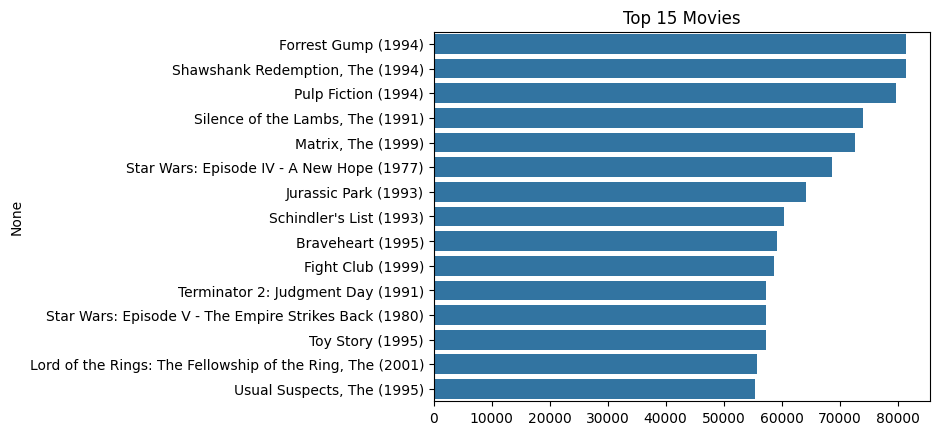

In [ ]:

tmp_d = Q_movies['title'].value_counts()
plt.title('Top 15 Movies')
sns.barplot(y=tmp_d.keys()[:15], x=tmp_d.values[:15])

<Axes: title={'center': 'Count Movies'}>

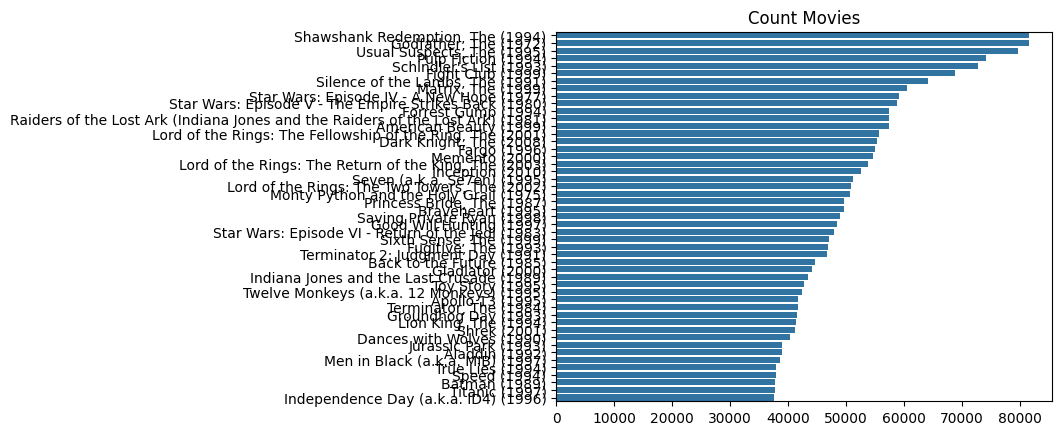

In [ ]:

plt.title('Count Movies')
sns.barplot(y = list(Q_movies['title'].unique()) , x = list(Q_movies['title'].value_counts()))

In [ ]:
movie_rate.head()

title,Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),Fight Club (1999),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,4.0,0.0,0.0,3.5,1.0,0.0,0.0
3,0.0,5.0,0.0,3.5,0.0,0.0,0.0,5.0,0.0,5.0,...,4.0,4.0,4.0,4.0,4.0,0.0,4.0,0.0,4.5,5.0
4,0.0,0.0,0.0,2.5,0.0,0.0,0.0,4.5,0.0,0.0,...,3.5,4.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0
5,4.0,0.0,5.0,3.0,3.0,0.0,3.0,0.0,3.0,0.0,...,5.0,5.0,5.0,0.0,0.0,0.0,4.0,0.0,5.0,5.0


In [ ]:
df = pd.DataFrame()
df['count_rating'] = pd.DataFrame(data.groupby('title')['rating'].count())

In [ ]:

df.head()

,count_rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",1
"""Great Performances"" Cats (1998)",179
#1 Cheerleader Camp (2010),9
#Captured (2017),2
#Female Pleasure (2018),3


In [ ]:
def get_recommendations(title , min_rating_count = 50):

    user_rating = movie_rate[title]

    similar_movies = movie_rate.corrwith(user_rating)

    corr_movies = pd.DataFrame(similar_movies , columns = ['correlations'])

    corr_movies.dropna(inplace = True)

    corr_movies = corr_movies.join(df['count_rating'], how='left', lsuffix='_left', rsuffix='_right')

    final = corr_movies[corr_movies['count_rating'] > min_rating_count].sort_values('correlations' , ascending = False)

    return final

In [ ]:
recommended = get_recommendations('Batman (1989)')
recommended.head(10)

,correlations,count_rating
title,,
Batman (1989),1.000000,44110
True Lies (1994),0.543756,41673
Dances with Wolves (1990),0.485415,41615
"Fugitive, The (1993)",0.483237,49638
Apollo 13 (1995),0.456971,48377
Speed (1994),0.456920,41302
Jurassic Park (1993),0.451769,64144
Aladdin (1992),0.434737,43387
Terminator 2: Judgment Day (1991),0.414158,57379


<Axes: title={'center': 'Best 10 Movies For Year of the Horse Movie'}>

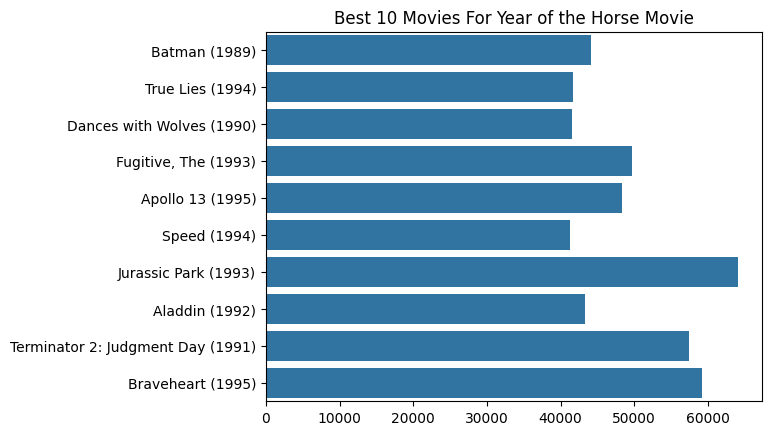

In [ ]:
plt.title('Best 10 Movies For Year of the Horse Movie')
sns.barplot(y = list(recommended.index)[:10] , x = list(recommended['count_rating'])[:10])